<a href="https://colab.research.google.com/github/kristianJW54/ML-Models-and-Projects/blob/main/Derivatives_and_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Derivatives & Polynomial Regression

---

A derivative outputs an expression we can use to calculate the instantaneous rate of change, or slope, at a single point on a line. After solving for the derivative you can use it to calculate the slope at every other point on the line.

#### Using limit

Computing the derivative of a function is essentially generating an imaginary point an infinitesimally small distance away from x
to compute the slope between x and the new point.

In this way, derivatives help us answer the question: how does f(x) change if we make a very very tiny increase to x? In other words, derivatives help estimate the slope between two points that are an infinitesimally small distance away from each other. A very, very, very small distance, but large enough to calculate the slope.

In math language we represent this infinitesimally small increase using a limit. A limit is defined as the output value a function approaches as the input value approaches another value. In our case the target value is the specific point at which we want to calculate slope.

In [2]:
def get_derivative(func, x):
    """Compute the derivative of `func` at the location `x`."""
    e = 0.0001                          # step size
    return (func(x+e) - func(x)) / e # Here we divide by e to get the derivative otherwise the output would be a decimal 0.000X

def f(x): return x**2                   # some test function f(x)=x^2
x = 3                                   # the location of interest
computed = get_derivative(f, x)
actual = 2*x

computed, actual   # = 6.0001, 6

(6.000100000012054, 6)

#### Chain Rule

The chain rule is a formula for calculating the derivatives of composite functions. Composite functions are functions composed of functions inside other function(s).

Given a composite function $f(x)=A(B(x))$
, the derivative of $f(x)$
 equals the product of the derivative of A
 with respect to $B(x)$
 and the derivative of B
 with respect to x
.

**composite function derivative = outer function derivative ∗ inner function derivative**

For example, given a composite function $f(x)$
, where:

$f(x)=h(g(x))$
The chain rule tells us that the derivative of $f(x)$
 equals:

${df\over dx}={dg\over dg}⋅{dg\over dx}$

### Example on Polynomial Data

---

Using sample data:

- We will build a Polynomial Regression Model
- Compute the MSE and Gradients
- Step through how the derivatives are derived
- Plot the rate of change of the MSE
- Train a model using the gradients with gradient descent
- Test the model outputs


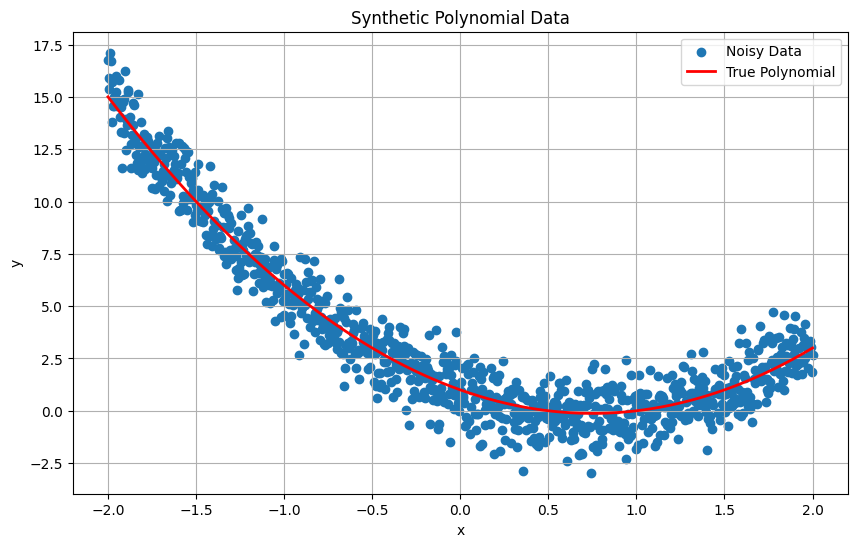

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic polynomial data
np.random.seed(0)  # for reproducibility

# Define polynomial parameters
true_coeffs = [1, -3, 2]  # coefficients of the polynomial: 1 - 3x + 2x^2
degree = len(true_coeffs) - 1

# Generate x values
num_samples = 1000
x = np.linspace(-2, 2, num_samples)

# Generate polynomial features
X_poly = np.column_stack([x ** i for i in range(degree + 1)])

# Generate synthetic y values (true outputs)
y_true = np.dot(X_poly, true_coeffs)

# Add noise to y values
noise = np.random.normal(scale=1, size=num_samples)
y_noisy = y_true + noise

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Noisy Data')
plt.plot(x, y_true, color='red', linewidth=2, label='True Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Polynomial Data')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
X = x[:, np.newaxis]
y = y_noisy

In polynomial regression, we aim to fit a polynomial function to our data. The general form of a polynomial regression model is:

$f(x;w) = w0 + w1x + w2x^2 + w3x^3 ....wnx^n$

Where:

- W is the weights of the polynomial
- X is the input feature
- n is the degree of the polynomial

The loss function measures the discrepancy between the predictions of our model and the actual values in the dataset.

MSE:

$MSE = {2\over m} ∑^m_{i=1}(f(w;x_i)-y_i)^2$

Gradient descent is an optimization algorithm used to minimize the loss function by iteratively adjusting the model parameters (weights) in the direction of steepest descent of the loss function. The key idea is to compute the gradient of the loss function with respect to the model parameters and update the parameters in the opposite direction of the gradient.



####Steps in calculating the analytical derivatives for gradient descent

1. Polynomial Features

 - Purpose: Generate Polynomial features for the input data up to the given degree
 - Explanation: We need to transform the data $x$ into polynomial features $x^0, x^1, x^2,....x^n$ to fit the polynomial regression model

2. Prediction

 - Purpose: Predict the output for input data using the polynomial features and weights
 - Explanation: We use the polynomial features and model weights to compute the predicted outputs using dot product

3. Loss Computation

 - Purpose: Compute the MSE between the true and predicted values
 - Explanation: We need to quantify how well our model is performing by measuring the average squared difference between the predicted and actual outputs.

4. Gradient Calculation

 - Purpose: Compute the gradient of the MSE loss with respect to the model parameters (weights)
 - Explanation: We need to know how the loss changes with respect to each weight to update the weights in the right direction
     - This will be through either the limit definition or the analytical calculus approach

5. Gradient Descent Update

 - Purpose: Update the model paramters (weights) using the computed gradients to minimize the loss function
 - Explanation: We update the weights in the opposite direction of the gradients to move towards the minimum of the loss function

In [5]:
print(X.shape)
print(y.shape)

print(X[:10])
print(y[:10])

# X is a column vector
# y is a 1d vector

(1000, 1)
(1000,)
[[-2.        ]
 [-1.995996  ]
 [-1.99199199]
 [-1.98798799]
 [-1.98398398]
 [-1.97997998]
 [-1.97597598]
 [-1.97197197]
 [-1.96796797]
 [-1.96396396]]
[16.76405235 15.35614523 15.89077815 17.10904964 16.69189484 13.8033035
 15.68697846 14.54190562 14.5464809  15.0167993 ]


#### Creating Polynomial Features

In [6]:
def poly_feature(x, degree):
  n_samples = x.shape[0]

  x_poly = np.ones((n_samples, degree + 1))

  for d in range(1, degree + 1):
    x_poly[:, d] = x[:, 0] ** d
  return x_poly

X_poly = poly_feature(X, 2)

print("Poly Features")
print(X_poly[:10])

Poly Features
[[ 1.         -2.          4.        ]
 [ 1.         -1.995996    3.98400002]
 [ 1.         -1.99199199  3.9680321 ]
 [ 1.         -1.98798799  3.95209624]
 [ 1.         -1.98398398  3.93619245]
 [ 1.         -1.97997998  3.92032072]
 [ 1.         -1.97597598  3.90448106]
 [ 1.         -1.97197197  3.88867346]
 [ 1.         -1.96796797  3.87289792]
 [ 1.         -1.96396396  3.85715445]]


>Column 1 : Represents the Bias term $x^0$ and is always set to 1

>Column 2: Represents the $x^1$ polynomial and is equal to the original input values $x$

>Column 3: Represents the $x^2$ polynomial degree which is the squared values of the input $x$

#### Splitting the data

**Train, Cross Validation, Test Split**

(600, 3)
(200, 3)
(200, 3)


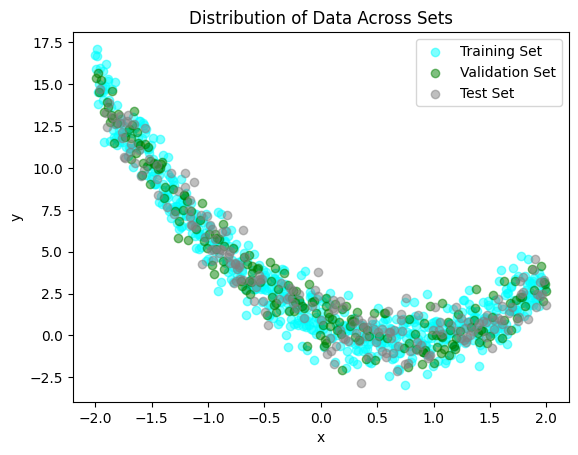

In [7]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Plotting the training set
plt.scatter(X_train[:, 1], y_train, label='Training Set', color='cyan', alpha=0.5)

# Plotting the validation set
plt.scatter(X_val[:, 1], y_val, label='Validation Set', color='green', alpha=0.5)

# Plotting the test set
plt.scatter(X_test[:, 1], y_test, label='Test Set', color='grey', alpha=0.5)

# Adding labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribution of Data Across Sets')
plt.legend()
plt.show()

####Define a Loss Function

>MSE

**$MSE = {1\over 2m} ∑^m_{i=1}(f(x_i)-y_i)^2$**

In [8]:
def mse(f_x, y):
  """
    Compute the Mean Squared Error (MSE) between predicted values and actual target values.

    Args:
    - f_x (numpy array): Predicted values (shape: [n_samples])
    - y (numpy array): Actual target values (shape: [n_samples])

    Returns:
    - mse (float): Mean Squared Error
    """
  return np.sum((f_x - y) ** 2) / (2 * len(y))

####Computing the derivative/gradient

The derivative of the MSE $J(0)$ with respect to a particular parameter $0_j$ can be expressed as:

>${∂J(0)\over ∂0_j} = {1\over m} ∑^m_{i=1} (f(x^{(i)}) - y^{(i)} · x^{(i)j}$

Where:

>$m$ = the number of samples

>$f(x^{(i)}$ represents the predicted value for the sample

>$y^{(i)}$ represents the actual target value for the ith sample

>$x^{(i)j}$ represents the jth power of the input feature $x$ for the ith sample

**Steps**

1. Error Residuals

>Compute the residuals $(f(x^{(i)}) - y^{(i)})$ for each sample

2. Input features

>Multiply each residual by the corrensponding j-th power of the input feature $x$ for the i-th sample
- This step scales the residuals by the input features to capture the contribution of each parameter to the error

3. Average Gradient

>Take the average of these scaled residuals across all samples and divide by the number of sample

**Explained**

1. Rate of Change

>The derivative ${∂J(0)\over ∂0_j}$ represents the rate of change of the MSE with respect to the parameter $0_j$
- It indicates how much the MSE would change for a small change in the parameter $0_j$

2. Gradient Interpretation

>This derivative is essentially the gradient of the MSE loss function with respect to $0_j$
- It indicates the direction and magnitude of the steepest ascent of the MSE surface in the parameter space

3. Contribution to Error

>The term $f(x^{(i)}) - y^{(i)}) ⋅ x^{(i)j}$ represents the contribution of the parameter $0_j$ to the error for each sample $i$
- It captures how changes in $0_j$ affect the predicted values $f(x^{(i)})$ and subsequently the error
- Multiplying by $x^{(i)j}$ scales this contribution by the j-th power of the input feature $x$

####How is this derived?

The derivative of the Mean Squared Error (MSE) with respect to a parameter $0_j$ in the polynomial regression model can be derived using calculus, specifically the chain rule.

>To recap: The $f(x^{(i)})$ function is the polynomial regression function and the MSE is the mean squared error function.

>To compute the derivative: ${∂J(0)\over ∂0_j}$ we apply the chain rule of calculus. The chain rule states that if $j$ is a function of $f$, and $f$ is a function of $0_j$, then the derivative of $j$ with respect to $0_j$ is:

**${∂J(0)\over ∂0_j}$  = ${∂J(0)\over ∂f} ⋅ {∂f\over ∂(0_j)}$**

1. **Derivative with respect to $f$**

>${∂J(0)\over ∂f}$ = ${1\over m} ∑^m_{i=1} (f(x^{(i)}) - y^{(i)})$

2. **Derivative with respect to $0_j$**

>This derivative depends on the form of the polynomial $f(x^{(i)})$

>If $f(x^{(i)})$ = $0_0 + 0_1x + 0_2x^2....0_nx^n$

>Then ${∂f\over ∂0_j}$ Simplifies to $x^{(i)j}$

By combining these two we get the expression:

>${∂J(0)\over ∂0_j} = {1\over m} ∑^m_{i=1} (f(x^{(i)}) - y^{(i)} · x^{(i)j}$

####Gradient Descent

In [9]:
#We have a matrix of X with each column being a number raised to a power X(i)
#We need to calculate the gradient for each and for the j-th sample

#Initialize coefs
coefs = np.ones(X_train.shape[1])

def compute_gradient(x_poly, y, coefs):

  #Get length of y
  m = len(y)

  #compute predicted values
  prediction = np.dot(x_poly, coefs)

  #Get error f(x) - y
  error = prediction - y

  #Return gradient
  gradient = np.dot(x_poly.T, error) / m

  return gradient


#Initalize empty cost list for plotting
mse_list = []


#Set learning rate and epochs for gradient descent
learning_rate = 0.01
epochs = 1000

for i in range(epochs):

  gradient = compute_gradient(X_train, y_train, coefs)

  coefs -= learning_rate * gradient

  mse_list.append(mse(np.dot(X_train, coefs), y_train))

  if i % 100 == 0:

    f_x = np.dot(X_train, coefs)
    cost = mse(f_x, y_train)
    print("================================")
    print(f"Iteration {i} | Cost {cost}")

print(f" Final Parameters {coefs}")



Iteration 0 | Cost 12.445187868571004
Iteration 100 | Cost 1.2350699584746268
Iteration 200 | Cost 0.554876465938968
Iteration 300 | Cost 0.5006684383813809
Iteration 400 | Cost 0.4928351136009643
Iteration 500 | Cost 0.4902945013513087
Iteration 600 | Cost 0.48915849025388886
Iteration 700 | Cost 0.48861974350761955
Iteration 800 | Cost 0.4883620419842363
Iteration 900 | Cost 0.4882386255333698
 Final Parameters [ 0.77108906 -2.99872289  2.13367902]


####Plotting the descent

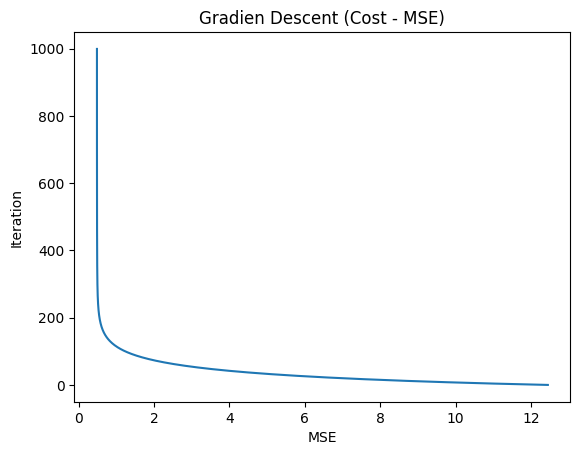

In [10]:
plt.plot(mse_list, range(epochs))
plt.title("Gradien Descent (Cost - MSE)")
plt.xlabel("MSE")
plt.ylabel("Iteration")

plt.show()

####Plotting the trained data

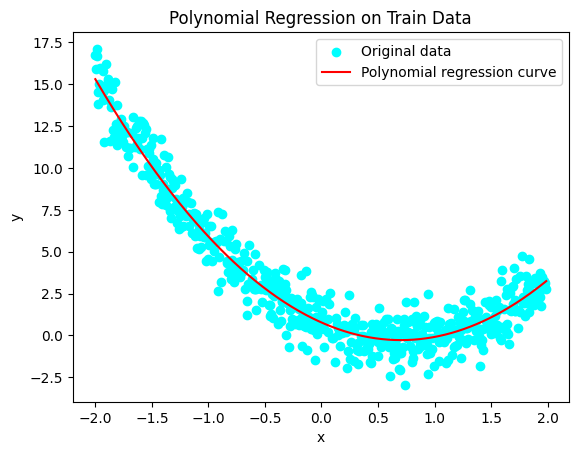

In [11]:
# Generating predictions using the trained coefs
fx = np.dot(X_train, coefs)

plt.scatter(X_train[:, 1], y_train, color='cyan', label='Original data')

# Plot the predictions for the training data points
# plt.scatter(X_train[:, 1], f_x, color='green', label='Predicted values')

# # To plot a smooth curve, generate more x values within the range of X_train
x_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 500).reshape(-1, 1)
x_range_poly = poly_feature(x_range, degree)
y_range = x_range_poly.dot(coefs)

plt.plot(x_range, y_range, color='red', label='Polynomial regression curve')
# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression on Train Data')
plt.show()

####Model Scoring

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def predict(X, coefs):
  return np.dot(X, coefs)


y_val_pred = predict(X_val, coefs)
y_test_pred = predict(X_test, coefs)

# Calculate MSE
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate MAE
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Validation MSE: {mse_val}, Test MSE: {mse_test}")
print(f"Validation RMSE: {rmse_val}, Test RMSE: {rmse_test}")
print(f"Validation MAE: {mae_val}, Test MAE: {mae_test}")
print(f"Validation R²: {r2_val}, Test R²: {r2_test}")

Validation MSE: 0.8975168322267204, Test MSE: 1.0182816740740805
Validation RMSE: 0.9473736497426559, Test RMSE: 1.0090994371587374
Validation MAE: 0.7858770021706485, Test MAE: 0.7988669090485544
Validation R²: 0.9559840299318252, Test R²: 0.9402409106923384


**$R^2$ for Test Data = 0.94**

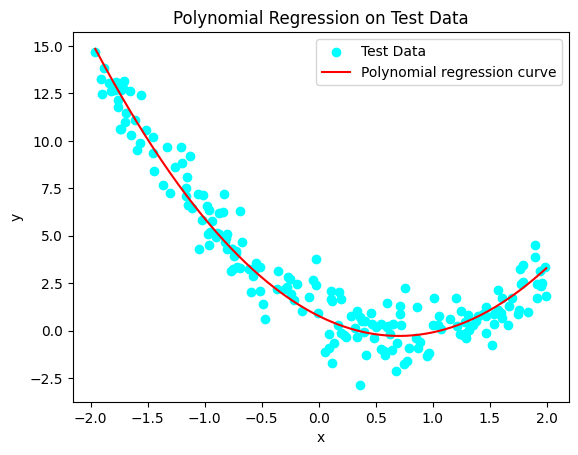

In [18]:
fx = np.dot(X_test, coefs)

plt.scatter(X_test[:, 1], y_test, color='cyan', label='Test Data')

# # To plot a smooth curve, generate more x values within the range of X_test
x_range = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 500).reshape(-1, 1)
x_range_poly = poly_feature(x_range, degree)
y_range = x_range_poly.dot(coefs)

plt.plot(x_range, y_range, color='red', label='Polynomial regression curve')
# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression on Test Data')
plt.show()